In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

# Fractional Flow and Oil Recovery Prediction for Waterflood:
### (L.P. Dake - Exercise 10.1 page 365 and Exercise 10.2 page 369)

Oil is being displaced by water in a horizontal, direct line drive under the diffuse flow condition. The rock relative permeability functions for water and oil are listed in given table.

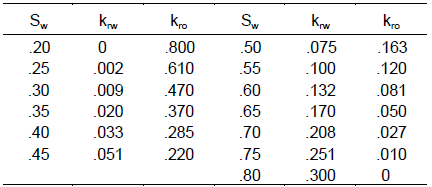

Pressure is being maintained at its initial value for which

Bo = 1.3 rb/stb and Bw = 1.0 rb/stb

Compare the values of the producing watercut (at surface conditions) and the cumulative oil recovery at breakthrough for the following fluid combinations.


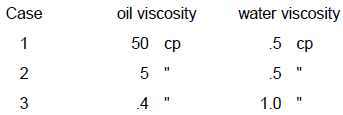


Assume that the relative permeability and PVT data are relevant for all three cases.

#### Relevant Formulae:

$$
\Large\ f_w=\frac{q_w}{q_w+q_o}=\frac{1}{1+\frac{k_{ro}\mu _w}{k_{rw}\mu _o}}\\
\Large\ f_{ws}=\frac{q_w/B_w}{q_w/B_w+q_o/B_o}=\frac{1}{1+\frac{B_w}{B_o}(\frac{1}{f_w}-1)}
$$
At the time of Breakthrough:
$$\Large\ N_{{pd}_{bt}}=W_{{id}_{bt}}=\frac{q_it_{bt}}{LA\phi}=(\bar{\bar{S}}_{w_{bt}}-S_{wc})=\frac{1}{{\frac{df_w}{dS_w}}\mid_{S_{w_{bt}}}}$$
After Breakthrough:
$$\Large\ N_{pd}=\bar{\bar{S}}_w-S_{wc}=(S_{we}-S_{wc})+(1-f_{we})\frac{1}{{\frac{df_w}{dS_w}}\mid_{S_{w_{bt}}}}$$
End point Mobility ratio:
$$M=\frac{k'_{rw}/\mu _w}{k'_{ro}/\mu _o}$$
Shock front Mobility ratio:
$$M_s=\frac{k_{ro}(S_{wf})/\mu _o+k_{rw}(S_{wf})/\mu _w}{k'_{ro}/\mu _o}$$

In [2]:
Bo = 1.3 #rb/stb
Bw = 1.0 #rb/stb

# rel perm

Sw = np.array([.2,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80])
krw = np.array([0,.002,.009,.020,.033,.051,.075,.1,.132,.17,.208,.251,.3])
kro = np.array([.8,.61,.47,.37,.285,.22,.163,.12,.081,.05,.027,.01,0])
df = pd.DataFrame({'$S_w$':Sw, '$k_{rw}$':krw, '$k_{ro}$':kro})
df

,$S_w$,$k_{rw}$,$k_{ro}$
0,0.20,0.000,0.800
1,0.25,0.002,0.610
2,0.30,0.009,0.470
3,0.35,0.020,0.370
4,0.40,0.033,0.285
5,0.45,0.051,0.220
6,0.50,0.075,0.163
7,0.55,0.100,0.120
8,0.60,0.132,0.081
9,0.65,0.170,0.050


Text(0.5, 0, '$S_w$')

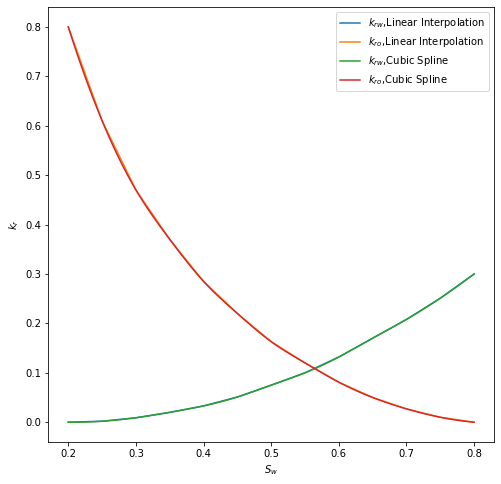

In [3]:
plt.figure(figsize=(8,8))

# Cubic Spline for smoothening and interpolation
csplinew = interpolate.splrep(Sw, krw, s=0)
csplineo = interpolate.splrep(Sw, kro, s=0)
Sw_new = np.linspace(.2, .8, 100)
krw_new = interpolate.splev(Sw_new, csplinew, der=0)
kro_new = interpolate.splev(Sw_new, csplineo, der=0)
plt.plot(Sw,krw,Sw,kro,Sw_new,krw_new,Sw_new,kro_new)
plt.legend(['$k_{rw}$,Linear Interpolation','$k_{ro}$,Linear Interpolation','$k_{rw}$,Cubic Spline','$k_{ro}$,Cubic Spline'])
plt.ylabel('$k_r$')
plt.xlabel('$S_w$')

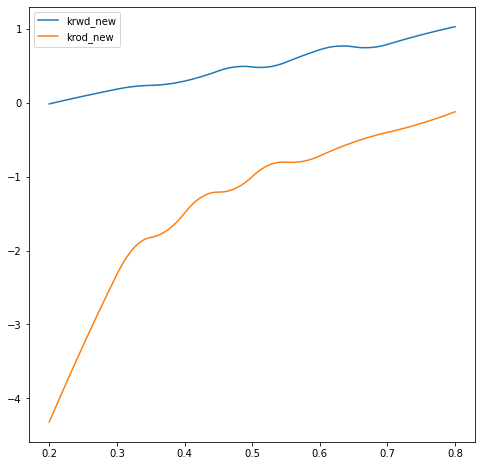

In [4]:
plt.figure(figsize=(8,8))
krwd_new = interpolate.splev(Sw_new, csplinew, der=1)
krod_new = interpolate.splev(Sw_new, csplineo, der=1)
plt.plot(Sw_new,krwd_new,Sw_new,krod_new)
plt.legend(['krwd_new','krod_new'])

$$\Large\ \mu _r=\frac{\mu _w}{\mu _o}$$

$$\Large\ k_r=\frac{k_{ro}}{k_{rw}}$$

In [5]:
mur1 = .01
mur2 = .1
mur3 = 2.5

# Generating Fractional Flow curves

df['$k_r$'] = df['$k_{ro}$']/df['$k_{rw}$']
df['$f_{w_1}$'] = 1/(1+mur1*df['$k_r$'])
df['$f_{w_2}$'] = 1/(1+mur2*df['$k_r$'])
df['$f_{w_3}$'] = 1/(1+mur3*df['$k_r$'])

df

,$S_w$,$k_{rw}$,$k_{ro}$,$k_r$,$f_{w_1}$,$f_{w_2}$,$f_{w_3}$
0,0.20,0.000,0.800,inf,0.000000,0.000000,0.000000
1,0.25,0.002,0.610,305.000000,0.246914,0.031746,0.001310
2,0.30,0.009,0.470,52.222222,0.656934,0.160714,0.007601
3,0.35,0.020,0.370,18.500000,0.843882,0.350877,0.021164
4,0.40,0.033,0.285,8.636364,0.920502,0.536585,0.044266
5,0.45,0.051,0.220,4.313725,0.958647,0.698630,0.084859
6,0.50,0.075,0.163,2.173333,0.978729,0.821468,0.155440
7,0.55,0.100,0.120,1.200000,0.988142,0.892857,0.250000
8,0.60,0.132,0.081,0.613636,0.993901,0.942184,0.394619
9,0.65,0.170,0.050,0.294118,0.997067,0.971429,0.576271


In [6]:
# Defining smoothened fw function
Swc = .2
Sw_new = np.linspace(.2, .8, 100)
def fw_new(fwa):
    csplinefw = interpolate.splrep(Sw, fwa, s=0)   # Cubic Spline Interpolation
    return interpolate.splev(Sw_new, csplinefw, der=0)

# Defining Derivative fw function

def dfwdSw(fwa):
    csplinefw = interpolate.splrep(Sw, fwa, s=0)   # Cubic Spline Interpolation
    return interpolate.splev(Sw_new, csplinefw, der=1)

# Getting shock front saturation, fw, derivative fw and average saturation behind shock front from smoothened fw

def Swfinfo1():     # Case 1
    fwa = df['$f_{w_1}$']
    expsn = dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc))
    ind = int(np.where(abs(expsn) == min(abs(expsn)))[0])
    return [Sw_new[ind],fw_new(fwa)[ind],dfwdSw(fwa)[ind],Swc+(Sw_new[ind]-Swc)/fw_new(fwa)[ind]]

def Swfinfo2():     # Case 2
    fwa = df['$f_{w_2}$']
    expsn = dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc))
    ind = int(np.where(abs(expsn) == min(abs(expsn)))[0])
    return [Sw_new[ind],fw_new(fwa)[ind],dfwdSw(fwa)[ind],Swc+(Sw_new[ind]-Swc)/fw_new(fwa)[ind]]

def Swfinfo3():     # Case 3
    fwa = df['$f_{w_3}$']
    expsn = (dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc)))[15:]
    ind = int(np.where(abs(expsn) == min(abs(expsn)))[0])+15   # initial indices cause error
    return [Sw_new[ind],fw_new(fwa)[ind],dfwdSw(fwa)[ind],Swc+(Sw_new[ind]-Swc)/fw_new(fwa)[ind]]


Text(0, 0.5, '$f_{w_2}\\, Derivative$')

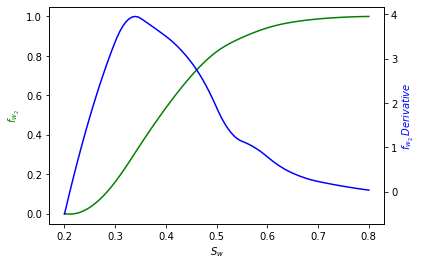

In [7]:
# Plotting fw and fw derivative for case 2:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Sw_new, fw_new(df['$f_{w_2}$']), 'g-')
ax2.plot(Sw_new, dfwdSw(df['$f_{w_2}$']), 'b-')

ax1.set_xlabel('$S_w$')
ax1.set_ylabel('$f_{w_2}$', color='g')
ax2.set_ylabel('$f_{w_2}\, Derivative$', color='b')

Text(0, 0.5, '$S_w$')

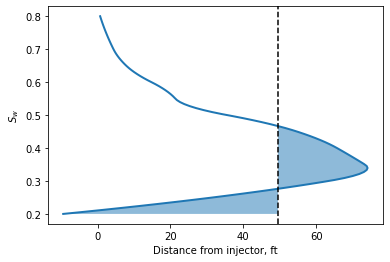

In [8]:
# Suppose following data is available for case 2:
Wi = 15000 #bbl   #cumulative water injection
A = 25000 #ft2   #cross-sectional area
L = 2000 #ft     #Length
phi = .18

x = Wi*5.615*dfwdSw(df['$f_{w_2}$'])/A/phi #distance

# Plotting Sw as a function of distance

plt.plot(x, Sw_new, linewidth=2)
plt.fill_between(x[:45], Sw_new[:45], .2, alpha=.5)
plt.axvline(x[44],color='k', linestyle='dashed')
plt.xlabel('Distance from injector, ft')
plt.ylabel('$S_w$')

### In the above figure, many positions have two saturation values, which is impractical. Also, intermediate saturations have higher velocity, so these will overtake lower saturations and a flood front will form (dashed line) at a distance, such that both shaded regions are equal, according to the principle of conservation of volume of water. Front saturation Swf will be estimated using Welge Technique. Past this front, initial or connate water saturation will exist.

# Welge Technique:


C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:18: RuntimeWarning: divide by zero encountered in true_divide
  expsn = dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc))
C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:24: RuntimeWarning: divide by zero encountered in true_divide
  expsn = dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc))
C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:30: RuntimeWarning: divide by zero encountered in true_divide
  expsn = (dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc)))[15:]


Text(0, 0.5, '$f_w$')

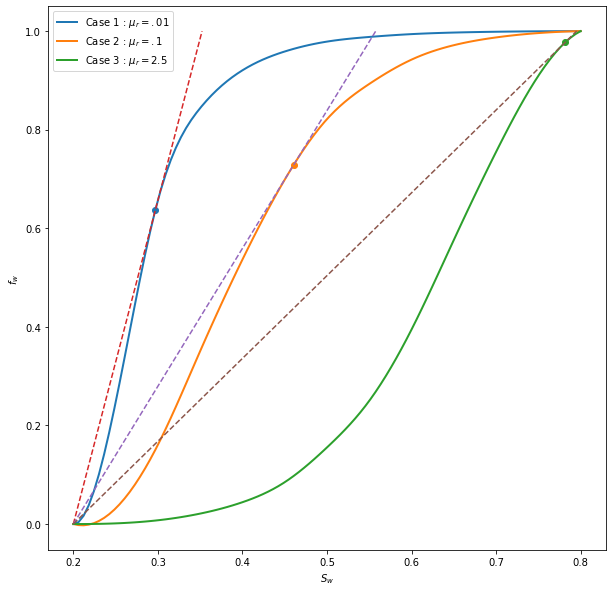

In [9]:
plt.figure(figsize=(10,10))
plt.plot(Sw_new, fw_new(df['$f_{w_1}$']), Sw_new, fw_new(df['$f_{w_2}$']), Sw_new, fw_new(df['$f_{w_3}$']), linewidth=2)
plt.legend(['Case 1 : $\mu _r=.01$', 'Case 2 : $\mu _r=.1$', 'Case 3 : $\mu _r=2.5$'])
plt.plot([.2,Swfinfo1()[-1]], [0,1], [.2,Swfinfo2()[-1]], [0,1], [.2,Swfinfo3()[-1]], [0,1], linestyle='dashed')

plt.scatter(Swfinfo1()[0],Swfinfo1()[1])
plt.scatter(Swfinfo2()[0],Swfinfo2()[1])
plt.scatter(Swfinfo3()[0],Swfinfo3()[1])

plt.xlabel('$S_w$')
plt.ylabel('$f_w$')

In [10]:
# Actual Sw vs. distance plots at different times for All Cases
q = 1000 #bbl/d

# Distance function for case 1
def x1(time):  # time in months
    xe = np.full((int(np.where(np.isclose(Sw_new,Swfinfo1()[0]))[0])),(q*time*30*5.615*dfwdSw(df['$f_{w_1}$'])/A/phi)[int(np.where(np.isclose(Sw_new,Swfinfo1()[0]))[0])])
    return np.append(xe,(q*time*30*5.615*dfwdSw(df['$f_{w_1}$'])/A/phi)[int(np.where(np.isclose(Sw_new,Swfinfo1()[0]))[0]):])
 
# Distance function for case 2
def x2(time):  # time in months
    xe = np.full((int(np.where(np.isclose(Sw_new,Swfinfo2()[0]))[0])),(q*time*30*5.615*dfwdSw(df['$f_{w_2}$'])/A/phi)[int(np.where(np.isclose(Sw_new,Swfinfo2()[0]))[0])])
    return np.append(xe,(q*time*30*5.615*dfwdSw(df['$f_{w_2}$'])/A/phi)[int(np.where(np.isclose(Sw_new,Swfinfo2()[0]))[0]):])

# Distance function for case 3
def x3(time):  # time in months
    xe = np.full((int(np.where(np.isclose(Sw_new,Swfinfo3()[0]))[0])),(q*time*30*5.615*dfwdSw(df['$f_{w_3}$'])/A/phi)[int(np.where(np.isclose(Sw_new,Swfinfo3()[0]))[0])])
    return np.append(xe,(q*time*30*5.615*dfwdSw(df['$f_{w_3}$'])/A/phi)[int(np.where(np.isclose(Sw_new,Swfinfo3()[0]))[0]):])


C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:18: RuntimeWarning: divide by zero encountered in true_divide
  expsn = dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc))


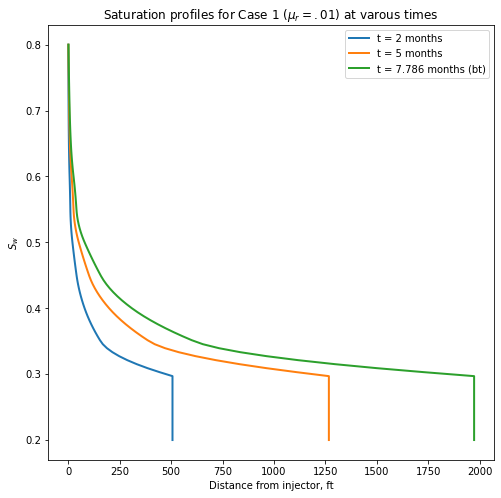

C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:24: RuntimeWarning: divide by zero encountered in true_divide
  expsn = dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc))


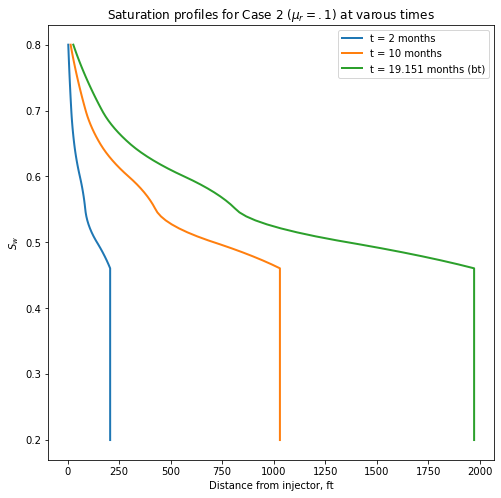

C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:30: RuntimeWarning: divide by zero encountered in true_divide
  expsn = (dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc)))[15:]


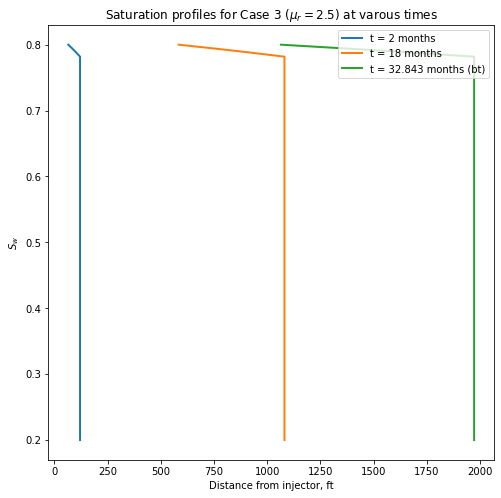

C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:18: RuntimeWarning: divide by zero encountered in true_divide
  expsn = dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc))
C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:24: RuntimeWarning: divide by zero encountered in true_divide
  expsn = dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc))
C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:30: RuntimeWarning: divide by zero encountered in true_divide
  expsn = (dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc)))[15:]


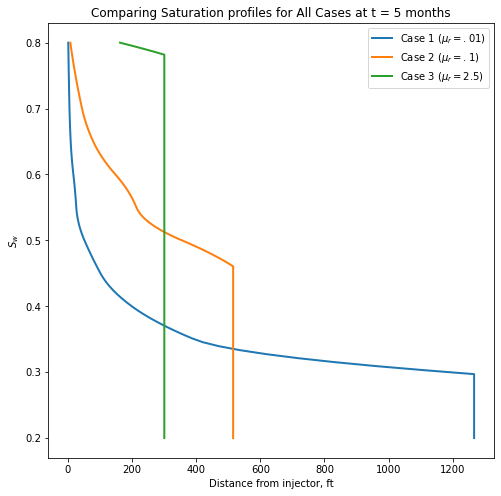

In [11]:
# Plots for Case 1
plt.figure(figsize=(8,8))
plt.plot(x1(2), Sw_new, x1(5), Sw_new, x1(7.786), Sw_new, linewidth=2)
plt.legend(['t = 2 months', 't = 5 months', 't = 7.786 months (bt)'])
plt.title('Saturation profiles for Case 1 ($\mu _r=.01$) at varous times')
plt.xlabel('Distance from injector, ft')
plt.ylabel('$S_w$')
plt.show()

# Plots for Case 2
plt.figure(figsize=(8,8))
plt.plot(x2(2), Sw_new, x2(10), Sw_new, x2(19.151), Sw_new, linewidth=2)
plt.legend(['t = 2 months', 't = 10 months', 't = 19.151 months (bt)'])
plt.title('Saturation profiles for Case 2 ($\mu _r=.1$) at varous times')
plt.xlabel('Distance from injector, ft')
plt.ylabel('$S_w$')
plt.show()

# Plots for Case 3
plt.figure(figsize=(8,8))
plt.plot(x3(2), Sw_new, x3(18), Sw_new, x3(32.843), Sw_new, linewidth=2)
plt.legend(['t = 2 months', 't = 18 months', 't = 32.843 months (bt)'])
plt.title('Saturation profiles for Case 3 ($\mu _r=2.5$) at varous times')
plt.xlabel('Distance from injector, ft')
plt.ylabel('$S_w$')
plt.show()

# Comparing All Cases at specific time
plt.figure(figsize=(8,8))
plt.plot(x1(5), Sw_new, x2(5), Sw_new, x3(5), Sw_new, linewidth=2)
plt.legend(['Case 1 ($\mu _r=.01$)', 'Case 2 ($\mu _r=.1$)', 'Case 3 ($\mu _r=2.5$)'])
plt.title('Comparing Saturation profiles for All Cases at t = 5 months')
plt.xlabel('Distance from injector, ft')
plt.ylabel('$S_w$')
plt.show()

### Case 3 Plot shows piston-like displacement, which will be shown afterwards too. Last Plot shows that for the same amount of water injected, breakthrough is early for case 1, which is very inefficient displacement.

In [12]:
Swbt = np.array([Swfinfo1()[0], Swfinfo2()[0], Swfinfo3()[0]])
fwbt = np.array([Swfinfo1()[1], Swfinfo2()[1], Swfinfo3()[1]])
fwsbt = 1/(1+Bw/Bo*(1/fwbt-1))
Swbtavg = np.array([Swfinfo1()[-1], Swfinfo2()[-1], Swfinfo3()[-1]])
Npdbt = 1/np.array([Swfinfo1()[-2], Swfinfo2()[-2], Swfinfo3()[-2]])

df1 = pd.DataFrame({'$S_{{w}_{bt}}$':Swbt, '$f_{{w}_{bt}}$':fwbt, '$f_{{ws}_{bt}}$':fwsbt, '$S_{{w}_{{bt}_{avg}}}$':Swbtavg, '$N_{{pd}_{bt}}$':Npdbt, })
df1

C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:18: RuntimeWarning: divide by zero encountered in true_divide
  expsn = dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc))
C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:24: RuntimeWarning: divide by zero encountered in true_divide
  expsn = dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc))
C:\Users\idris\AppData\Local\Temp\ipykernel_13096\2841690321.py:30: RuntimeWarning: divide by zero encountered in true_divide
  expsn = (dfwdSw(fwa)-(fw_new(fwa)/(Sw_new-Swc)))[15:]


,$S_{{w}_{bt}}$,$f_{{w}_{bt}}$,$f_{{ws}_{bt}}$,$S_{{w}_{{bt}_{avg}}}$,$N_{{pd}_{bt}}$
0,0.296970,0.637045,0.695281,0.352218,0.147755
1,0.460606,0.728739,0.777404,0.557612,0.363426
2,0.781818,0.977355,0.982489,0.795299,0.623253


### By comparing the above data, Case 3 is the most effective flood as it shows highest oil PV recovery, then Case 2 and lastly Case 1.

In [13]:
krw_ = krw[-1]  # krwmax
kro_ = kro[0]   # kromax

murinv = 1/np.array([mur1,mur2,mur3])
krwf = np.array([krw_new[int(np.where(np.isclose(Sw_new,i))[0])] for i in Swbt]) # Approx match lookup
krof = np.array([kro_new[int(np.where(np.isclose(Sw_new,i))[0])] for i in Swbt]) # Approx match lookup
Ms = (krof+krwf*murinv)/kro_   # Shock Front Mobility ratio
M = krw_/kro_*murinv           # End point Mobility ratio

df2 = pd.DataFrame({'$\mu _o/\mu _w$':murinv, '$S_{wf}$': Swbt, '$k_{rw}(S_{wf})$':krwf, '$k_{ro}(S_{wf})$':krof, '$M_s$':Ms, '$M$':M})
df2

,$\mu _o/\mu _w$,$S_{wf}$,$k_{rw}(S_{wf})$,$k_{ro}(S_{wf})$,$M_s$,$M$
0,100.0,0.296970,0.008440,0.477124,1.651463,37.50
1,10.0,0.460606,0.055771,0.207214,0.956154,3.75
2,0.4,0.781818,0.281545,0.002715,0.144166,0.15


#### Following conclusions can be drawn:

1. If M < 1, then water can't by-pass oil and it will be a piston-like displacement which is the most attractive (ideal) scenario of waterflood. Sharp interface between the fluids is present, as displayed by Case-3.
2. If M > 1 and Ms < 1, then water by-passes oil (non-ideal) and water saturation will decrease till the shock front. It can be modelled well by above approach, as displayed by Case-2.
3. If M > 1 and Ms > 1, then it is the most unfavourable scenario than above two cases, in which there will be viscous-fingering present and Breakthrough will occur earlier than predicted. It can't be modelled well by above approach, as displayed by Case-1.

#### OIL RECOVERY PREDICTION FOR A WATERFLOOD:
Water is being injected at a constant rate of 1000 b/d/well in a direct line drive in a reservoir which has the following rock and fluid properties.

φ = 0.18

Swc = 0.20

Sor = 0.20

μo = 5 cp

μw = 0.5 cp

The relative permeabilities for oil and water are presented previously and the flood pattern geometry is as follows:

Dip angle = 0°

Reservoir thickness = 40 ft

Distance between injection wells = 625 ft

Distance between injectors and producers = 2000 ft

Assuming that diffuse flow conditions prevail and that the injection project starts simultaneously with oil production from the reservoir,

1.) determine the time when breakthrough occurs

2.) determine the cumulative oil production as a function of both the cumulative water injected and the time.

In [14]:
# Data is similar to Case-2

L = 2000 #ft
A = 25000 #ft2
q = 1000 #bbl/d

# At breakthrough

df1[1:2]

,$S_{{w}_{bt}}$,$f_{{w}_{bt}}$,$f_{{ws}_{bt}}$,$S_{{w}_{{bt}_{avg}}}$,$N_{{pd}_{bt}}$
1,0.460606,0.728739,0.777404,0.557612,0.363426


In [15]:
# time at breakthrough

k = L*A*phi/q/5.615/365

tbt = k*Npdbt[1]
tbt #years

1.5959391782658303

In [16]:
# After breakthrough

# Swe, after Swbt, with increments of 5%

Swe = [.475]
[Swe.append(Swe[i-1]+.05) for i in range(1,7)]
Swe = np.array(Swe)

dfwdSwa = dfwdSw(df['$f_{w_2}$'])
fwa = fw_new(df['$f_{w_2}$'])
Wid = 1/np.array([dfwdSwa[int(np.where(np.isclose(Sw_new,i,0.002,0.002))[0])] for i in Swe])
fwe = np.array([fwa[int(np.where(np.isclose(Sw_new,i,0.002,0.002))[0])] for i in Swe])
Npd = (Swe-Swc)+(1-fwe)*Wid
time = k*Wid

df3 = pd.DataFrame({'$S_{we}$':Swe, '$W_{id}$':Wid,'$N_{pd}$':Npd, 'time (yrs)':time})
df3

,$S_{we}$,$W_{id}$,$N_{pd}$,time (yrs)
0,0.475,0.395874,0.369710,1.738429
1,0.525,0.741283,0.425065,3.255249
2,0.575,1.007559,0.455139,4.424563
3,0.625,1.721648,0.496143,7.560393
4,0.675,3.142861,0.538614,13.801460
5,0.725,5.844792,0.567774,25.666635
6,0.775,12.963769,0.592946,56.928685


Text(0.5, 0, 'time (yrs)')

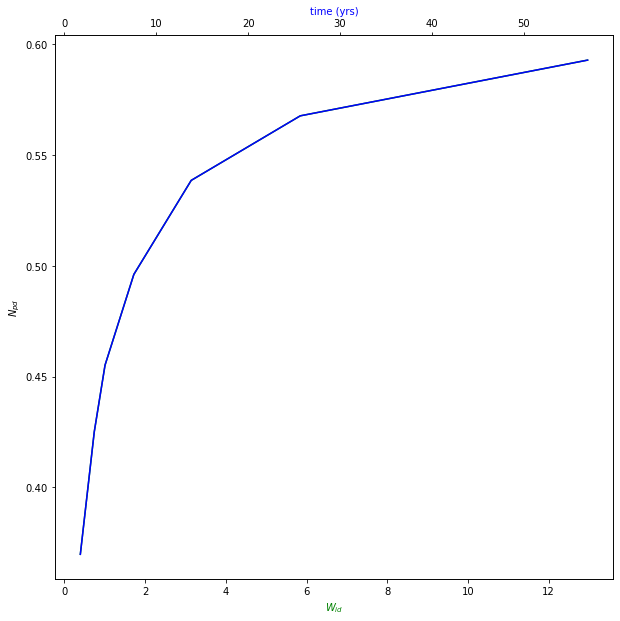

In [17]:
# Dimensionless oil recovery as function of dimensionless water injected and time

fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twiny()
ax1.plot(Wid, Npd, 'g-')
ax2.plot(time, Npd, 'b-')

ax1.set_ylabel('$N_{pd}$')
ax1.set_xlabel('$W_{id}$', color='g')
ax2.set_xlabel('time (yrs)', color='b')